In [1]:
import pandas as pd 
import numpy as np
import time 
import matplotlib.pyplot as plt

In [2]:
df_accx = pd.read_csv("Downloads/Train_1/Acc_x_train_1.csv", header=None)
df_accy = pd.read_csv("Downloads/Train_1/Acc_y_train_1.csv", header=None)
df_accz = pd.read_csv("Downloads/Train_1/Acc_z_train_1.csv", header=None)
df_gyrx = pd.read_csv("Downloads/Train_1/Gyr_x_train_1.csv", header=None)
df_gyry = pd.read_csv("Downloads/Train_1/Gyr_y_train_1.csv", header=None)
df_gyrz = pd.read_csv("Downloads/Train_1/Gyr_z_train_1.csv", header=None)
labels = pd.read_csv("Downloads/Train_1/labels_train_1.csv", header=None)


In [3]:
df_accx

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-1.077889,-1.489613,-1.438783,-1.457909,-1.330404,-1.071001,-1.506137,-1.439139,-1.466377,-1.402347,...,-1.019677,-0.830715,-0.964348,-1.084696,-1.079483,-1.091208,-1.107158,-1.155510,-1.126861,-1.147167
1,-1.146887,-1.160566,-0.977457,-1.152031,-0.687245,-0.994804,-0.850746,-0.717160,-0.880832,-0.787904,...,-0.939794,-0.681841,-0.672202,-0.806475,-0.852091,-0.756208,-0.291576,-0.888031,-0.839020,-0.808839
2,-0.810237,-0.803906,-0.937367,-0.888830,-0.853493,-0.866375,-1.002508,-0.936785,-0.911975,-0.909091,...,-0.818108,-0.805620,-0.764217,-0.773826,-0.802690,-0.800057,-0.768268,-0.876734,-0.862862,-0.911913
3,-0.946278,-1.021568,-0.935827,-0.886008,-0.869594,-0.796406,-0.803121,-0.829610,-0.901657,-0.922945,...,-0.851171,-0.866475,-0.802323,-0.945886,-0.964929,-0.708072,0.112631,-0.709495,-0.772995,-0.725184
4,-0.706771,-0.779546,-0.476212,-1.128938,-0.949800,-0.929042,-0.820955,-0.839328,-0.895739,-0.896472,...,-0.795637,-1.018215,-0.829386,-0.813845,-0.801443,-0.793584,-0.779280,-0.842876,-0.847628,-0.830808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,0.860861,0.926646,0.975781,1.000463,1.051148,1.099773,1.175936,1.191113,1.205718,1.119732,...,2.284014,2.307471,2.287213,2.286704,2.289199,2.289342,2.188936,2.147420,1.230552,1.223370
5207,0.867162,0.848416,0.827833,1.225863,1.845406,0.813404,1.207018,1.587939,1.426683,1.349285,...,2.523618,2.521772,2.532428,2.526269,2.517060,2.530315,2.525429,2.520982,2.525858,2.530050
5208,2.522300,2.519794,2.535938,2.519522,2.519759,2.509214,2.453885,2.368801,2.295425,2.289396,...,-0.386323,0.382729,0.606361,0.699973,0.862712,1.504549,1.233929,1.075532,0.822507,0.852235
5209,0.982926,1.053619,0.964799,0.930685,1.123505,1.204031,1.053841,0.939975,0.678140,0.989545,...,0.923341,1.355667,1.886200,2.014653,1.942238,1.842240,1.638945,2.089226,2.309646,2.244656


In [4]:
df_accy

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-3.042689,-2.849762,-2.866504,-2.872480,-3.046087,-3.295942,-2.864503,-2.893296,-2.894975,-3.134266,...,-2.704412,-2.635339,-2.640936,-2.724451,-2.703472,-2.688893,-2.698414,-2.699739,-2.695133,-2.704061
1,-2.695182,-2.651077,-2.985256,-3.222526,-3.320487,-2.823430,-2.846682,-2.807795,-2.881476,-2.836180,...,-2.866929,-2.301257,-2.170395,-2.720272,-2.765513,-2.872680,-3.229364,-2.929117,-2.860563,-2.859279
2,-2.834726,-2.863199,-2.790414,-2.808154,-2.794856,-2.861103,-2.807620,-2.783585,-2.812906,-2.812025,...,-2.825314,-2.802556,-2.800139,-2.793177,-2.791322,-2.794531,-2.793143,-2.820481,-2.775676,-2.795703
3,-2.800317,-2.810161,-2.784158,-2.803023,-2.790962,-2.791311,-2.797083,-2.778757,-2.772317,-2.761608,...,-2.800582,-2.768778,-2.783484,-2.741648,-2.713543,-2.758237,-2.897527,-2.868514,-2.848029,-2.860777
4,-2.842639,-2.790093,-3.053917,-2.802748,-2.785534,-2.770120,-2.764651,-2.784589,-2.785037,-2.775467,...,-1.853554,-2.466216,-2.635126,-2.616996,-2.615423,-2.613730,-2.631933,-2.621362,-2.623340,-2.658344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,4.862856,4.833499,4.696054,4.699973,4.773330,4.871981,5.052301,5.097763,4.987653,4.674787,...,5.579494,5.560665,5.584919,5.583107,5.584323,5.584497,5.471871,5.560278,5.248540,5.000719
5207,4.630720,4.541933,4.567318,4.485494,4.316146,4.522055,4.448091,4.353471,4.344239,4.478281,...,5.791800,5.784812,5.804014,5.787878,5.777855,5.793157,5.792883,5.797428,5.779568,5.800372
5208,5.798681,5.794846,5.806818,5.789714,5.786691,5.788064,5.751043,5.748245,5.787670,5.784572,...,7.085399,7.077344,6.440780,6.671841,6.272612,6.007163,5.931284,6.163937,6.469229,6.155357
5209,5.667661,5.600800,6.017774,6.642832,7.030796,6.161934,5.740471,5.891777,6.592513,6.658021,...,6.851487,6.824311,6.354765,5.720958,6.028545,6.837676,6.792713,6.397983,5.309706,5.216553


In [5]:
df_accz

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,9.490958,9.489082,9.491423,9.487663,9.456602,9.411505,9.475417,9.483038,9.474904,9.405075,...,9.599186,9.602288,9.607411,9.580112,9.577246,9.580301,9.577217,9.572769,9.575804,9.573681
1,9.571114,9.572043,9.525989,9.419051,9.433341,9.547120,9.574582,9.579921,9.560588,9.562423,...,9.553980,9.720186,9.728905,9.603864,9.596016,9.564214,9.491248,9.527392,9.558546,9.564704
2,9.572229,9.568761,9.545953,9.555552,9.566551,9.559498,9.552162,9.564638,9.567211,9.571621,...,9.578268,9.578344,9.583025,9.585149,9.583757,9.584450,9.581141,9.574511,9.573921,9.569919
3,9.570084,9.565324,9.563295,9.567150,9.578377,9.585310,9.584341,9.575999,9.578835,9.575119,...,9.574114,9.579842,9.586607,9.590036,9.581470,9.608931,9.580922,9.568507,9.568925,9.568788
4,9.582303,9.571570,9.545086,9.543188,9.571831,9.580899,9.578811,9.577550,9.580148,9.578360,...,9.807005,9.639631,9.626777,9.625316,9.628973,9.632085,9.628795,9.623408,9.619031,9.608914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,-8.282891,-8.396229,-8.389902,-8.387600,-8.348845,-8.214774,-8.307327,-7.994429,-8.185388,-8.392555,...,-7.619747,-7.611326,-7.597790,-7.585320,-7.573957,-7.576759,-7.682734,-7.607888,-8.011768,-8.183101
5207,-8.463002,-8.499518,-8.480191,-8.488051,-8.543510,-8.499769,-8.509555,-8.531914,-8.560138,-8.486094,...,-7.336627,-7.342599,-7.330303,-7.314101,-7.321386,-7.317653,-7.339694,-7.317185,-7.308462,-7.315197
5208,-7.350423,-7.321355,-7.321763,-7.318170,-7.361923,-7.338268,-7.385548,-7.419393,-7.439770,-7.412185,...,-6.887199,-7.078360,-6.880469,-7.118758,-7.405318,-7.421931,-7.640936,-7.394678,-7.160276,-7.491745
5209,-7.901480,-7.932793,-7.578076,-7.004648,-6.543246,-7.326815,-7.732219,-7.524221,-7.246010,-6.912945,...,-6.849268,-6.759649,-6.972498,-7.540784,-7.222463,-6.579629,-6.726451,-6.960347,-7.762013,-7.953816


In [6]:
df_gyrx

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.044689,0.001804,0.005565,-0.003941,-0.043541,0.064023,0.004858,0.005201,-0.003196,-0.041717,...,0.011573,0.000616,0.008934,0.001367,0.004991,0.007416,0.004105,0.006542,0.007273,0.005284
1,0.005139,-0.004273,-0.039340,-0.011162,0.048962,0.020793,0.008060,0.004712,0.006332,0.008611,...,0.004502,0.118724,-0.091203,0.001498,0.010531,-0.037979,0.013496,0.024111,0.008673,0.008108
2,0.006405,0.010463,0.005308,0.006266,0.004361,0.006804,0.008792,0.004064,0.006642,0.007317,...,0.006895,0.007931,0.006392,0.005661,0.006388,0.006541,0.005314,0.005523,0.005919,0.004173
3,0.008588,0.006357,0.005966,0.006403,0.006500,0.006352,0.007036,0.005384,0.007965,0.004927,...,0.009388,0.006430,0.010726,0.008252,0.006655,-0.005366,0.007891,0.003889,-0.001131,0.016977
4,0.006262,-0.006209,0.013502,0.012851,0.009323,0.005414,0.003975,0.009056,0.005005,0.007410,...,-0.038316,-0.026126,0.010279,0.006539,0.006541,0.005743,0.004882,0.007165,0.004564,0.006396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,0.022355,0.019537,0.005410,0.013490,0.013013,0.010854,-0.041205,0.025523,0.015009,0.022133,...,0.008812,0.008957,0.008602,0.008387,0.008289,0.012234,0.020669,0.003951,0.052558,0.049275
5207,0.036337,0.008847,0.007272,0.010888,0.007617,0.009544,0.009872,0.007857,0.009494,-0.001251,...,0.009017,0.008902,0.008474,0.009110,0.008600,0.008544,0.008851,0.009113,0.008318,0.008513
5208,0.008990,0.008754,0.008586,0.008532,0.008769,0.010709,0.012108,0.007472,0.008090,0.008575,...,0.042900,0.037741,-0.011432,0.039146,0.029058,0.033196,-0.011753,-0.008387,-0.009671,0.067382
5209,0.039663,0.031141,-0.046802,-0.086588,0.033047,0.083629,0.022939,-0.044531,0.029352,0.017676,...,0.001145,-0.004002,0.107119,0.024311,-0.099928,0.044294,0.003770,0.111473,0.060230,-0.020810


In [7]:
df_gyrz

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-0.065891,0.001752,0.002214,0.008423,0.051032,-0.062646,0.000257,0.000201,-0.001175,0.027014,...,0.008101,-0.021275,0.003528,0.006000,0.003261,-0.001911,-0.003524,0.008354,-0.000773,-0.001758
1,0.002253,0.008036,0.057290,-0.008912,-0.048192,-0.038033,0.021406,-0.024272,-0.024175,-0.007555,...,-0.008158,-0.027742,0.015705,-0.004679,0.004252,-0.006638,0.017289,0.004216,0.001229,-0.007947
2,0.001315,-0.002543,-0.001650,-0.003087,-0.009248,0.011387,0.008010,-0.008171,-0.013746,0.005458,...,-0.000102,0.006148,-0.005675,0.001848,0.001094,0.000182,-0.014065,0.018043,0.007523,-0.020283
3,0.013672,0.013287,-0.013796,-0.018822,0.001776,0.001189,-0.002629,0.010648,0.010476,-0.010974,...,-0.009821,-0.007985,0.014600,0.010818,-0.025211,-0.041516,0.019873,0.004239,-0.016336,0.010107
4,-0.001110,-0.007453,0.010066,0.017854,0.002559,-0.004822,-0.014810,0.001499,0.008106,-0.000204,...,-0.010408,0.001223,0.003416,-0.000007,-0.001007,0.003715,-0.005493,0.003147,-0.008621,-0.003543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,0.001933,0.007153,0.002779,-0.002976,0.003578,0.023481,0.021469,0.032933,0.019978,0.000872,...,0.001449,0.001165,0.001226,0.001371,0.001345,0.000857,0.017097,-0.025348,-0.001766,0.001660
5207,-0.002408,0.002520,0.004120,0.007650,0.003421,-0.006914,-0.001677,-0.001791,-0.008862,0.002801,...,0.001494,0.001179,0.001552,0.001185,0.001493,0.001522,0.001290,0.001443,0.001110,0.001402
5208,0.001726,0.001094,0.001068,0.001380,0.001159,0.002748,0.003701,-0.003369,0.001452,0.000204,...,0.019313,0.027336,-0.005125,-0.002831,0.007357,0.010148,-0.025632,-0.019468,-0.003817,-0.031496
5209,-0.045646,-0.018215,-0.005154,0.000623,0.009414,-0.035906,-0.072077,-0.074924,-0.020582,0.011039,...,0.001390,0.001864,0.062114,0.020310,-0.067189,0.023217,0.012615,0.072693,0.071525,0.051334


In [8]:
labels

,0
0,1
1,1
2,1
3,1
4,1
...,...
5206,4
5207,4
5208,4
5209,4


In [9]:
labels.iloc[np.where(labels==4)[0]]

,0
163,4
164,4
165,4
166,4
167,4
...,...
5206,4
5207,4
5208,4
5209,4


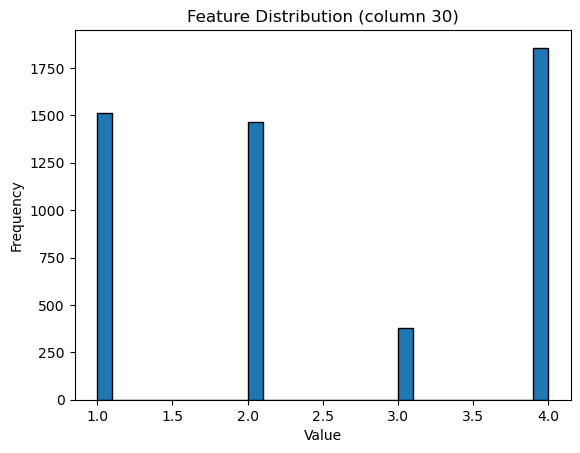

Percent of Data Labeled 1: 0.29034734216081365 
Percent of Data Labeled 2: 0.2807522548455191 
Percent of Data Labeled 3: 0.07253886010362694 
Percent of Data Labeled 4: 0.3563615428900403 
CPU times: total: 359 ms
Wall time: 392 ms


In [10]:
%%time
ones = labels.iloc[np.where(labels==1)[0]]
twos = labels.iloc[np.where(labels==2)[0]]
threes = labels.iloc[np.where(labels==3)[0]]
fours = labels.iloc[np.where(labels==4)[0]]

plt.hist(labels, bins=30, edgecolor='black')
plt.title('Feature Distribution (column 30)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print(f"Percent of Data Labeled 1: {len(ones) / len(labels)} ")
print(f"Percent of Data Labeled 2: {len(twos) / len(labels)} ")
print(f"Percent of Data Labeled 3: {len(threes) / len(labels)} ")
print(f"Percent of Data Labeled 4: {len(fours) / len(labels)} ")


## Data Description

### 6 datasets 
#### - 3 axes of linear acceleration 
#### - 3 axes of rotational acceleration. 

### Human Activity Recognition (HAR)

#### Data is split into 1-minute time windows with no overlap. The i-th row represents the i-th minute time window. Each row has 60 values, corresponding to the sensor axis measurement at each second of the i-th minute. Finally, the label for the i-th time window is stored as the i-th entry of the labels file. 

#### Different row are sorted in increasing time order but they may not be consecutive minute after minute (normally, the next row would be a minute ahead of the previous row but that may not be the case here).

#### We briefly note that the second data columns are a poor choice of features for statistical models. Could use deep-learning to automatically learn the feature representation. 

#### Do not use K-Fold Cross Validation due to the data being time dependent. Can use Holdout cross validation w/o shuffling (hold out the last k% of data or the middle k% of data)

#### We also note that consecutive rows often denote consecutive time windows, meaning that the labels between those consecutive rows should not change too frequently. We could thus consider a smoothing of predictions.

### Accuracy Metric
#### Micro-averaged F1 score: Treats each example equally and favors more frequent classes (activities)

#### Macro-averaged F1 score: treats each class equally. 


### Notes from Hammerla-2016-Deep, convolutional, and recurre.pdf
CNN -> RNN instead of just RNN on sequence of individual samples 
Max-in norm regularization: After each mini-batch the incoming weights of each unit in the network are scaled to have a maximum euclidean length of d_in

Mini-batch with stratification (Can we train w stratification?)

A forward LSTM contextualises the current time-step based on those it has seen previously and is inherently suitable for real-time application where, at inference time, the "future" is not yet known. Bi-directional LSTMs on the other hand use both the future and past context to intepret the input at tiemstep t, which makes then suitable for offline analysis scenarios

For RNN: To prevent a large RNN from memorizing the entire input-output sequence and generalizing poorly, we can introduce "breaks" where the internal states of the RNN are reset to zero: After each mini-batch we decide to retain the internal state of the RNN with a carry-over probabilitty p_carry and reset it to zero otherwise.

After each epoch of training we evaluate the performance of the model on the validation set. Each model is trained for at least 30 epochs and for a maximum of 300 epochs. After 30 epochs, training stops if there is no increase in validation performance for 10 subsequent epochs. We select the epoch that showed the best validation-set performance and apply the corresponding model to the test-set.

fANOVA : Determines the extent to which each hyper-parameter cotributes to a network's performance. It builds a predictive model (random forest) of the model performance as a func- tion of the model’s hyper-parameters.This non-linear model is then decomposed into marginal and joint interaction functions of the hyper-parameters, from which the percentage contribution to overall variability of network performance is obtained.

For CNNs we recommend to start exploring learning-rates, before optimising the architecture of the network, as the learning-parameters had the largest effect on performance in our experiments

However, we found that DNNs are very sensitive to their hyper-parameters and require a significant investment into parameter exploration.


### Two Approaches: 
#### 1) Feature Engineering + Classifier 
#### 2) Neural Networks (DNNs, CNNs, RNNs)

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks
from scipy.fftpack import fft
from scipy.signal import welch


In [12]:
def extract_time_features(x):
    features = {}
    features['mean'] = np.mean(x)
    features['std'] = np.std(x)
    features['var'] = np.var(x)
    features['median'] = np.median(x)
    features['min'] = np.min(x)
    features['max'] = np.max(x)
    features['range'] = np.max(x) - np.min(x)
    features['p10'] = np.percentile(x, 10)
    features['p25'] = np.percentile(x, 25)
    features['p75'] = np.percentile(x, 75)
    features['p90'] = np.percentile(x, 90)
    features['iqr'] = features['p75'] - features['p25']
    features['rms'] = np.sqrt(np.mean(x**2))
    
    # zero crossings
    features['zero_crossings'] = np.sum(np.diff(np.sign(x)) != 0)

    # peaks
    peaks, _ = find_peaks(x)
    features['num_peaks'] = len(peaks)

    # shape statistics
    features['skewness'] = skew(x)
    features['kurtosis'] = kurtosis(x)

    return features


In [13]:
def extract_freq_features(x, fs=1.0):
    # Compute FFT
    freqs = np.fft.rfftfreq(len(x), 1/fs)
    mag = np.abs(np.fft.rfft(x))

    features = {}
    features['spec_energy'] = np.sum(mag**2)
    features['dom_freq'] = freqs[np.argmax(mag)]
    features['mean_freq'] = np.sum(freqs * mag) / np.sum(mag)

    # spectral entropy
    p = mag / np.sum(mag)
    features['spec_entropy'] = -np.sum(p * np.log2(p + 1e-12))

    # spectral centroid
    features['spec_centroid'] = np.sum(freqs * mag) / np.sum(mag)

    # band powers (example)
    features['low_freq_energy'] = np.sum(mag[(freqs <= 0.1)])
    features['mid_freq_energy'] = np.sum(mag[(freqs > 0.1) & (freqs <= 0.3)])
    features['high_freq_energy'] = np.sum(mag[(freqs > 0.3)])

    return features


In [14]:
def extract_autocorr_features(x):
    corr = np.correlate(x - np.mean(x), x - np.mean(x), mode='full')
    corr = corr[len(corr)//2:]  # keep positive lags

    features = {
        'autocorr_lag1': corr[1] / corr[0],
        'autocorr_lag2': corr[2] / corr[0],
        'autocorr_max': np.max(corr[1:]) / corr[0]
    }
    return features


In [15]:
def extract_features_from_axis(x):
    f = {}
    f.update(extract_time_features(x))
    f.update(extract_freq_features(x))
    f.update(extract_autocorr_features(x))
    return f


In [16]:
def extract_features_from_dataset(data):
    rows = []
    for i in range(data.shape[0]):
        row_features = extract_features_from_axis(data.iloc[i])
        rows.append(row_features)
    return pd.DataFrame(rows)


In [17]:
%%time
features_df = extract_features_from_dataset(df_accx)
print(features_df.shape)


(5211, 28)
CPU times: total: 21.8 s
Wall time: 22.9 s


In [18]:
features_df

,mean,std,var,median,min,max,range,p10,p25,p75,...,dom_freq,mean_freq,spec_entropy,spec_centroid,low_freq_energy,mid_freq_energy,high_freq_energy,autocorr_lag1,autocorr_lag2,autocorr_max
0,-1.190703,0.347513,0.120765,-1.137014,-1.883107,0.073880,1.956987,-1.518844,-1.456492,-0.996147,...,0.0,0.075244,2.953078,0.075244,96.776904,20.351286,11.425189,0.746275,0.575587,0.746275
1,-0.802572,0.166017,0.027562,-0.821124,-1.160566,-0.291576,0.868990,-0.941571,-0.896220,-0.755923,...,0.0,0.087039,2.856027,0.087039,59.682984,11.792792,9.541081,0.361170,0.161548,0.361170
2,-0.782922,0.151545,0.022966,-0.803298,-1.002508,-0.089104,0.913404,-0.927304,-0.867109,-0.741392,...,0.0,0.077634,2.751381,0.077634,57.537837,11.479539,7.405578,0.532272,0.292779,0.532272
3,-0.844172,0.191887,0.036821,-0.875538,-1.061969,0.112631,1.174600,-0.989800,-0.949065,-0.796573,...,0.0,0.092494,3.046454,0.092494,62.094764,17.112121,10.828433,0.372950,0.052901,0.372950
4,-0.748877,0.238754,0.057004,-0.808516,-1.128938,0.088193,1.217131,-0.954825,-0.895922,-0.703322,...,0.0,0.106770,3.421837,0.106770,60.916198,20.515946,12.142907,0.433426,0.119399,0.433426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,1.664175,0.742419,0.551187,2.168178,-0.017777,2.514385,2.532162,0.667173,1.051990,2.333478,...,0.0,0.062169,2.869605,0.062169,155.762443,20.055291,14.295202,0.909414,0.823551,0.909414
5207,1.929627,0.822055,0.675774,2.521377,-0.493841,2.649703,3.143544,0.846358,1.277756,2.534336,...,0.0,0.070662,3.077855,0.070662,183.029265,31.521028,17.435307,0.885083,0.773435,0.885083
5208,1.410571,0.658274,0.433325,1.282742,-0.386323,2.535938,2.922261,0.735760,0.881660,2.015422,...,0.0,0.087053,3.376923,0.087053,132.930171,36.100510,18.808526,0.834505,0.685026,0.834505
5209,1.320829,0.481604,0.231942,1.419496,0.100870,2.403774,2.302904,0.772698,0.987890,1.461541,...,0.0,0.078816,3.123163,0.078816,118.065433,22.733905,15.164752,0.807172,0.649683,0.807172


In [19]:
all_axes = [df_accx,df_accy,df_accz,df_gyrx,df_gyry,df_gyrz]

In [20]:
%%time
feature_dfs = []
for axis_data in all_axes:   # list of 6 arrays, each shape (5211, 60)
    feature_dfs.append(extract_features_from_dataset(axis_data))

# concatenate side-by-side
final_features = pd.concat(feature_dfs, axis=1)
print(final_features.shape)


(5211, 168)
CPU times: total: 2min 8s
Wall time: 2min 14s


In [22]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neural_network import MLPClassifier
import joblib
import warnings

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

warnings.filterwarnings("ignore")

In [23]:
RANDOM_STATE = 42
VAL_FRAC = 0.20   # fraction of the data to hold out as validation (time-based, last VAL_FRAC)


# ====== Helper: time-aware train/val split ======
def time_holdout_split(X, y, val_frac=VAL_FRAC):
    """
    Hold out the last val_frac fraction of the samples as validation (no shuffling).
    Inputs:
      X: numpy array or DataFrame, shape (n_samples, n_features)
      y: array-like shape (n_samples,)
    Returns:
      X_train, X_val, y_train, y_val  (as np.arrays)
    """
    n = len(X)
    split = int(np.floor((1.0 - val_frac) * n))
    if isinstance(X, pd.DataFrame):
        X_train = X.iloc[:split].values
        X_val = X.iloc[split:].values
    else:
        X_train = X[:split]
        X_val = X[split:]
    y_train = np.asarray(y[:split])
    y_val = np.asarray(y[split:])
    return X_train, X_val, y_train, y_val

def scale_data(X_train, X_val):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    return X_train_scaled, X_val_scaled, scaler


def evaluate_model(clf, X_val, y_val, model_name):
    y_pred = clf.predict(X_val)
    micro = f1_score(y_val, y_pred, average="micro")
    macro = f1_score(y_val, y_pred, average="macro")
    print(f"=== {model_name} ===")
    print(f"Micro F1: {micro:.4f} | Macro F1: {macro:.4f}")
    print(classification_report(y_val, y_pred, zero_division=0))
    return {"model": model_name, "micro_f1": micro, "macro_f1": macro}

class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dims=[256, 128], n_classes=10, dropout=0.3):
        super().__init__()
        layers = []
        prev = input_dim
        for h in hidden_dims:
            layers.append(nn.Linear(prev, h))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
            prev = h
        layers.append(nn.Linear(prev, n_classes))
        self.net = nn.Sequential(*layers)
    def forward(self, x):
        return self.net(x)

def train_torch_mlp(X_train, y_train, X_val, y_val, n_classes, device='cpu',
                    hidden_dims=[256,128], lr=1e-3, batch_size=64, epochs=40):
    X_train_t = torch.tensor(X_train, dtype=torch.float32)
    y_train_t = torch.tensor(y_train, dtype=torch.long)
    X_val_t = torch.tensor(X_val, dtype=torch.float32)
    y_val_t = torch.tensor(y_val, dtype=torch.long)

    train_ds = TensorDataset(X_train_t, y_train_t)
    val_ds = TensorDataset(X_val_t, y_val_t)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

    model = SimpleMLP(input_dim=X_train.shape[1], hidden_dims=hidden_dims, n_classes=n_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    best_macro = -np.inf
    best_state = None
    for epoch in range(1, epochs+1):
        model.train()
        running_loss = 0.0
        for xb, yb in train_loader:
            xb = xb.to(device); yb = yb.to(device)
            optimizer.zero_grad()
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * xb.size(0)
        avg_train_loss = running_loss / len(train_loader.dataset)

        model.eval()
        all_preds = []
        all_targets = []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb = xb.to(device)
                out = model(xb)
                preds = out.argmax(dim=1).cpu().numpy()
                all_preds.append(preds)
                all_targets.append(yb.numpy())
        all_preds = np.concatenate(all_preds)
        all_targets = np.concatenate(all_targets)
        micro = f1_score(all_targets, all_preds, average='micro')
        macro = f1_score(all_targets, all_preds, average='macro')
        if macro > best_macro:
            best_macro = macro
            best_state = model.state_dict()
        if epoch % 10 == 0 or epoch == 1:
            print(f"[Epoch {epoch}/{epochs}] loss={avg_train_loss:.4f} microF1={micro:.4f} macroF1={macro:.4f}")

    if best_state is not None:
        model.load_state_dict(best_state)
    return model, {"micro_f1": micro, "macro_f1": macro}

def run_all_models(X, y, val_frac=VAL_FRAC, random_state=RANDOM_STATE):
    X_train, X_val, y_train, y_val = time_holdout_split(X, y, val_frac=val_frac)
    print(f"Train samples: {len(X_train)} | Val samples: {len(X_val)}")

    X_train_s, X_val_s, scaler = scale_data(X_train, X_val)

    results = []

    lr = LogisticRegression(max_iter=2000, random_state=random_state, n_jobs=-1, penalty='elasticnet', solver="saga", l1_ratio=.5) #penalty='elasticnet'
    lr.fit(X_train_s, y_train)
    results.append(evaluate_model(lr, X_val_s, y_val, "LogisticRegression"))

    ridge = RidgeClassifier()
    ridge.fit(X_train_s, y_train)
    results.append(evaluate_model(ridge, X_val_s, y_val, "RidgeClassifier"))

    rf = RandomForestClassifier(n_estimators=200, random_state=random_state, n_jobs=-1)
    rf.fit(X_train_s, y_train)
    results.append(evaluate_model(rf, X_val_s, y_val, "RandomForest"))

    mlp = MLPClassifier(hidden_layer_sizes=(256,128), max_iter=500, early_stopping=True, random_state=random_state)
    mlp.fit(X_train_s, y_train)
    results.append(evaluate_model(mlp, X_val_s, y_val, "Sklearn-MLP"))

    xgb_clf = xgb.XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric="mlogloss", random_state=random_state)
    xgb_clf.fit(X_train_s, y_train)
    results.append(evaluate_model(xgb_clf, X_val_s, y_val, "XGBoost"))


    lgb_clf = lgb.LGBMClassifier(n_estimators=200, random_state=random_state, verbose=-1)
    lgb_clf.fit(X_train_s, y_train)
    results.append(evaluate_model(lgb_clf, X_val_s, y_val, "LightGBM"))


    cat_clf = CatBoostClassifier(verbose=0, random_state=random_state, iterations=500)
    cat_clf.fit(X_train_s, y_train)
    results.append(evaluate_model(cat_clf, X_val_s, y_val, "CatBoost"))


    n_classes = int(np.max(y) + 1)
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print("Training PyTorch MLP on device:", device)
    pt_model, pt_scores = train_torch_mlp(X_train_s, y_train, X_val_s, y_val, n_classes=n_classes, device=device,
                                          hidden_dims=[256,128], lr=1e-3, batch_size=64, epochs=30) 
    results.append({"model":"PyTorch-MLP", **pt_scores})

    results_df = pd.DataFrame(results).sort_values(by="macro_f1", ascending=False).reset_index(drop=True)
    return results_df



In [24]:
labels.shape

(5211, 1)

In [25]:
X = final_features
y = np.array(labels-1).reshape(-1)# [0,1,2,3] instead of [1,2,3,4]

In [26]:
X.shape,y.shape

((5211, 168), (5211,))

In [27]:
X

,mean,std,var,median,min,max,range,p10,p25,p75,...,dom_freq,mean_freq,spec_entropy,spec_centroid,low_freq_energy,mid_freq_energy,high_freq_energy,autocorr_lag1,autocorr_lag2,autocorr_max
0,-1.190703,0.347513,0.120765,-1.137014,-1.883107,0.073880,1.956987,-1.518844,-1.456492,-0.996147,...,0.200000,0.263599,4.847519,0.263599,1.233349,3.014218,3.009460,-0.096190,-0.094664,0.160999
1,-0.802572,0.166017,0.027562,-0.821124,-1.160566,-0.291576,0.868990,-0.941571,-0.896220,-0.755923,...,0.500000,0.279939,4.779676,0.279939,0.668683,1.757529,1.932478,-0.226272,-0.050484,0.274015
2,-0.782922,0.151545,0.022966,-0.803298,-1.002508,-0.089104,0.913404,-0.927304,-0.867109,-0.741392,...,0.450000,0.290819,4.705399,0.290819,0.320308,1.086190,1.301430,-0.317144,0.035153,0.219555
3,-0.844172,0.191887,0.036821,-0.875538,-1.061969,0.112631,1.174600,-0.989800,-0.949065,-0.796573,...,0.266667,0.254787,4.660721,0.254787,0.581575,1.333235,1.103543,0.004476,-0.196065,0.164865
4,-0.748877,0.238754,0.057004,-0.808516,-1.128938,0.088193,1.217131,-0.954825,-0.895922,-0.703322,...,0.133333,0.255330,4.814490,0.255330,0.755771,1.751072,1.559830,-0.023017,0.021484,0.306300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,1.664175,0.742419,0.551187,2.168178,-0.017777,2.514385,2.532162,0.667173,1.051990,2.333478,...,0.066667,0.214507,4.708155,0.214507,0.728378,0.898524,0.656098,0.235567,0.079760,0.235567
5207,1.929627,0.822055,0.675774,2.521377,-0.493841,2.649703,3.143544,0.846358,1.277756,2.534336,...,0.100000,0.215367,4.723796,0.215367,0.946790,1.150810,1.129364,0.199884,0.022407,0.199884
5208,1.410571,0.658274,0.433325,1.282742,-0.386323,2.535938,2.922261,0.735760,0.881660,2.015422,...,0.000000,0.156628,4.583365,0.156628,5.937762,5.668933,1.824343,0.648675,0.181491,0.648675
5209,1.320829,0.481604,0.231942,1.419496,0.100870,2.403774,2.302904,0.772698,0.987890,1.461541,...,0.150000,0.206938,4.703709,0.206938,1.610361,2.647873,1.397824,0.435025,0.069032,0.435025


In [28]:
%%time
# ====== Example usage ======
# Expected: X: (n_samples, n_features), y: (n_samples,)

results = run_all_models(X, y, val_frac=0.20)
print("\nSummary (sorted by macro F1):")
print(results)

Train samples: 4168 | Val samples: 1043
=== LogisticRegression ===
Micro F1: 0.8389 | Macro F1: 0.8681
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       322
           1       0.95      0.90      0.93       113
           2       0.86      0.97      0.91        31
           3       0.91      0.81      0.85       577

    accuracy                           0.84      1043
   macro avg       0.86      0.88      0.87      1043
weighted avg       0.85      0.84      0.84      1043

=== RidgeClassifier ===
Micro F1: 0.8926 | Macro F1: 0.9117
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       322
           1       0.96      0.95      0.96       113
           2       0.91      0.97      0.94        31
           3       0.95      0.86      0.90       577

    accuracy                           0.89      1043
   macro avg       0.90      0.92      0.91      1043
weighted avg       0.9

  File "C:\Users\ekkoi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\ekkoi\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ekkoi\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ekkoi\anaconda3\Lib\subprocess.

=== LightGBM ===
Micro F1: 0.8313 | Macro F1: 0.8828
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       322
           1       0.96      0.97      0.97       113
           2       0.91      1.00      0.95        31
           3       0.94      0.76      0.84       577

    accuracy                           0.83      1043
   macro avg       0.87      0.91      0.88      1043
weighted avg       0.86      0.83      0.83      1043

=== CatBoost ===
Micro F1: 0.8686 | Macro F1: 0.9077
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       322
           1       0.96      0.98      0.97       113
           2       0.94      1.00      0.97        31
           3       0.95      0.82      0.88       577

    accuracy                           0.87      1043
   macro avg       0.90      0.93      0.91      1043
weighted avg       0.88      0.87      0.87      1043

Training PyTorch MLP on 

### Deep Learning

In [29]:
import torch.nn.functional as F
import math
from torch.utils.data import Dataset, DataLoader
from sklearn.utils.class_weight import compute_class_weight


In [30]:
X = np.stack([
    df_accx,
    df_accy,
    df_accz,
    df_gyrx,
    df_gyry,
    df_gyrz, 
], axis=1)   # shape = (N, 6, 60)

y = np.array(labels-1).reshape(-1)


In [31]:
X.shape

(5211, 6, 60)

In [32]:
N = X.shape[0]
split = int(N * 0.7)

X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]


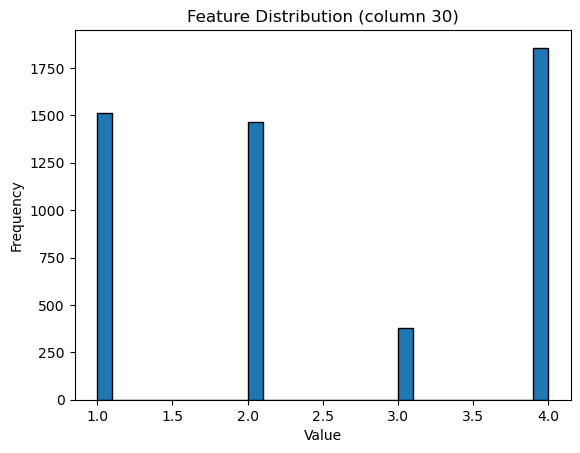

Percent of Data Labeled 0: 0.2960358056265985 
Percent of Data Labeled 1: 0.20971867007672634 
Percent of Data Labeled 2: 0.04603580562659847 
Percent of Data Labeled 3: 0.44820971867007675 
CPU times: total: 312 ms
Wall time: 360 ms


In [33]:
%%time
y_labels = y_val
ones = y_labels[np.where(y_labels==0)[0]]
twos = y_labels[np.where(y_labels==1)[0]]
threes = y_labels[np.where(y_labels==2)[0]]
fours = y_labels[np.where(y_labels==3)[0]]

plt.hist(labels, bins=30, edgecolor='black')
plt.title('Feature Distribution (column 30)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print(f"Percent of Data Labeled 0: {len(ones) / len(y_labels)} ")
print(f"Percent of Data Labeled 1: {len(twos) / len(y_labels)} ")
print(f"Percent of Data Labeled 2: {len(threes) / len(y_labels)} ")
print(f"Percent of Data Labeled 3: {len(fours) / len(y_labels)} ")


In [34]:
num_features = X.shape[2]
num_features

60

In [35]:
scaler = StandardScaler()

X_train_flat = X_train.reshape(-1, 6*num_features)
X_val_flat   = X_val.reshape(-1, 6*num_features)

scaler.fit(X_train_flat)

X_train = scaler.transform(X_train_flat).reshape(-1, 6, num_features)
X_val   = scaler.transform(X_val_flat).reshape(-1, 6, num_features)


In [36]:
X_train.shape,X_val.shape

((3647, 6, 60), (1564, 6, 60))

In [37]:
y_train

array([0, 0, 0, ..., 0, 0, 3])

In [38]:
y_val

array([3, 3, 3, ..., 3, 3, 3])

In [39]:
class HARdataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = HARdataset(X_train, y_train)
val_ds   = HARdataset(X_val, y_val)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=256, shuffle=False)

In [40]:
class BaselineCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        self.conv = nn.Sequential(
            nn.Conv1d(6, 32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.BatchNorm1d(32),

            nn.Conv1d(32, 64, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.BatchNorm1d(64),

            nn.AdaptiveAvgPool1d(1)
        )

        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.conv(x)
        x = x.squeeze(-1)
        return self.fc(x)

class HAR_CNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv1d(6, 32, kernel_size=9, padding=3),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.MaxPool1d(2),   # 60 -> 30

            nn.Conv1d(32, 64, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.AdaptiveAvgPool1d(1),

        )

        self.classifier = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.squeeze(-1)
        return self.classifier(x)

In [41]:
class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dims=[256, 128], n_classes=10, dropout=0.3):
        super().__init__()
        layers = []
        prev = input_dim
        for h in hidden_dims:
            layers.append(nn.Linear(prev, h))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
            prev = h
        layers.append(nn.Linear(prev, n_classes))
        self.net = nn.Sequential(*layers)
        self.flatten = nn.Flatten()
    def forward(self, x):
        x = self.flatten(x) 
        return self.net(x)

In [42]:
def train_model(model, train_loader, val_loader, epochs=30, lr=1e-3, maxInNorm=False):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = model.to(device)

    class_weights = torch.Tensor(compute_class_weight('balanced', classes=np.unique(y), y=y))
    criterion = nn.CrossEntropyLoss()

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    history = [] 
    for epoch in range(1, epochs+1):
        model.train()
        loss = 0
        for Xb, yb in train_loader:
            Xb, yb = Xb.to(device), yb.to(device)

            optimizer.zero_grad()
            logits = model(Xb)
            loss = criterion(logits, yb)
            loss.backward()
            optimizer.step()
            if maxInNorm:
                apply_max_in_norm(model, d_in)

        # Evaluate
        model.eval()
        preds, true = [], []
        with torch.no_grad():
            for Xb, yb in val_loader:
                Xb = Xb.to(device)
                out = model(Xb)
                pred = out.argmax(dim=1).cpu().numpy()
                preds.append(pred)
                true.append(yb.numpy())

        preds = np.concatenate(preds)
        true  = np.concatenate(true)

        micro_f1 = f1_score(true, preds, average='micro')
        macro_f1 = f1_score(true, preds, average='macro')
        history.append({
            "epoch":epoch,
            "microF1": micro_f1,
            "macroF1": macro_f1,
            "loss": loss.item(),
        })

        print(f"Epoch {epoch:02d} | loss: {loss:.4f} micro F1: {micro_f1:.4f}  macro F1: {macro_f1:.4f}")
    return history

In [43]:
def plotResults(data: list[dict]):
    epochs = [d["epoch"] for d in data]
    losses = [d["loss"] for d in data]
    micro_f1 = [d["microF1"] for d in data]
    macro_f1 = [d["macroF1"] for d in data]
    
    # Epoch Vs Loss
    plt.figure(figsize=(7, 4))
    plt.plot(epochs, losses, marker="o")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Epoch vs Loss")
    plt.grid(True)
    plt.show()
    
    # Epoch vs Micro/Macro F1
    plt.figure(figsize=(7, 4))
    plt.plot(epochs, micro_f1, marker="o", label="Micro F1")
    plt.plot(epochs, macro_f1, marker="o", label="Macro F1")
    plt.xlabel("Epoch")
    plt.ylabel("F1 Score")
    plt.title("Epoch vs Micro & Macro F1")
    plt.grid(True)
    plt.legend()
    plt.show()


In [44]:
num_classes = len(np.unique(y))
print(X_train.shape,X_val.shape)
print(num_classes)

(3647, 6, 60) (1564, 6, 60)
4


In [45]:
%%time
input_dim = 6*60 # 6 datasets, 60 features 
model = SimpleMLP(input_dim=input_dim, hidden_dims=[256,128], n_classes=num_classes)
historyDNN = train_model(model,train_loader,val_loader,epochs=50,lr=1e-4)

Epoch 01 | loss: 1.0052 micro F1: 0.5320  macro F1: 0.3658
Epoch 02 | loss: 0.7212 micro F1: 0.6138  macro F1: 0.4503
Epoch 03 | loss: 0.7085 micro F1: 0.6343  macro F1: 0.4728
Epoch 04 | loss: 0.4961 micro F1: 0.6426  macro F1: 0.5002
Epoch 05 | loss: 0.5780 micro F1: 0.6624  macro F1: 0.5558
Epoch 06 | loss: 0.5251 micro F1: 0.6835  macro F1: 0.5901
Epoch 07 | loss: 0.4841 micro F1: 0.6937  macro F1: 0.6300
Epoch 08 | loss: 0.4857 micro F1: 0.6829  macro F1: 0.6403
Epoch 09 | loss: 0.3364 micro F1: 0.6950  macro F1: 0.6573
Epoch 10 | loss: 0.2054 micro F1: 0.7059  macro F1: 0.6702
Epoch 11 | loss: 0.3832 micro F1: 0.7168  macro F1: 0.6821
Epoch 12 | loss: 0.4139 micro F1: 0.7295  macro F1: 0.6947
Epoch 13 | loss: 0.2003 micro F1: 0.7289  macro F1: 0.6904
Epoch 14 | loss: 0.2401 micro F1: 0.7219  macro F1: 0.6930
Epoch 15 | loss: 0.2638 micro F1: 0.7468  macro F1: 0.7144
Epoch 16 | loss: 0.3660 micro F1: 0.7263  macro F1: 0.7121
Epoch 17 | loss: 0.2023 micro F1: 0.7161  macro F1: 0.71

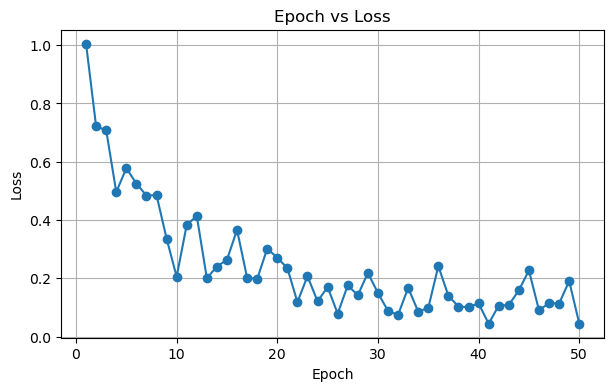

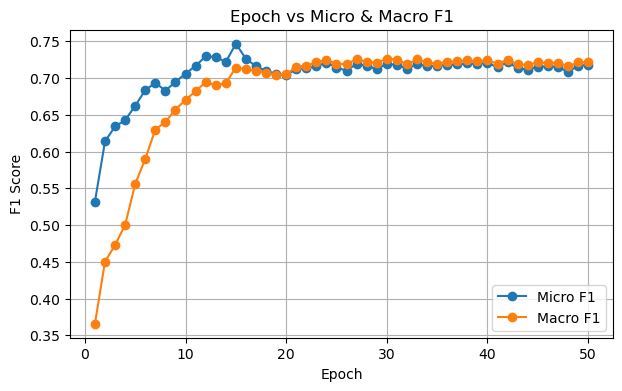

In [46]:
plotResults(historyDNN)

In [47]:
%%time
model = BaselineCNN(num_classes)
historyBaselineCNN = train_model(model, train_loader, val_loader, epochs=50, lr=1e-4,maxInNorm=False) # reduced lr 


Epoch 01 | loss: 0.7743 micro F1: 0.6061  macro F1: 0.4836
Epoch 02 | loss: 0.6536 micro F1: 0.6694  macro F1: 0.6395
Epoch 03 | loss: 0.4500 micro F1: 0.6912  macro F1: 0.6651
Epoch 04 | loss: 0.5135 micro F1: 0.7116  macro F1: 0.6823
Epoch 05 | loss: 0.2825 micro F1: 0.6854  macro F1: 0.6701
Epoch 06 | loss: 0.4341 micro F1: 0.6886  macro F1: 0.6714
Epoch 07 | loss: 0.4848 micro F1: 0.6848  macro F1: 0.6709
Epoch 08 | loss: 0.2863 micro F1: 0.6886  macro F1: 0.6752
Epoch 09 | loss: 0.2433 micro F1: 0.6912  macro F1: 0.6784
Epoch 10 | loss: 0.2277 micro F1: 0.7014  macro F1: 0.6856
Epoch 11 | loss: 0.2433 micro F1: 0.7008  macro F1: 0.6865
Epoch 12 | loss: 0.1874 micro F1: 0.6969  macro F1: 0.6830
Epoch 13 | loss: 0.2471 micro F1: 0.6976  macro F1: 0.6901
Epoch 14 | loss: 0.2866 micro F1: 0.7027  macro F1: 0.7018
Epoch 15 | loss: 0.2475 micro F1: 0.7142  macro F1: 0.7145
Epoch 16 | loss: 0.2827 micro F1: 0.7238  macro F1: 0.7278
Epoch 17 | loss: 0.2174 micro F1: 0.7206  macro F1: 0.72

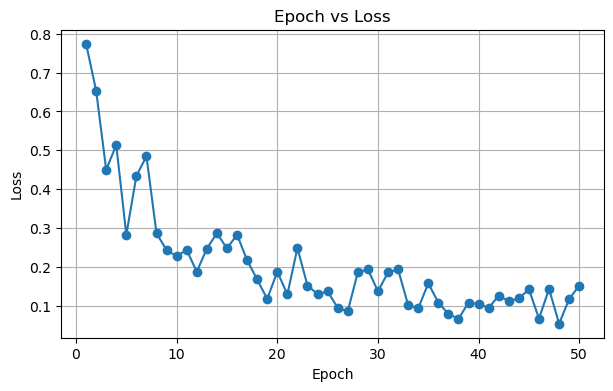

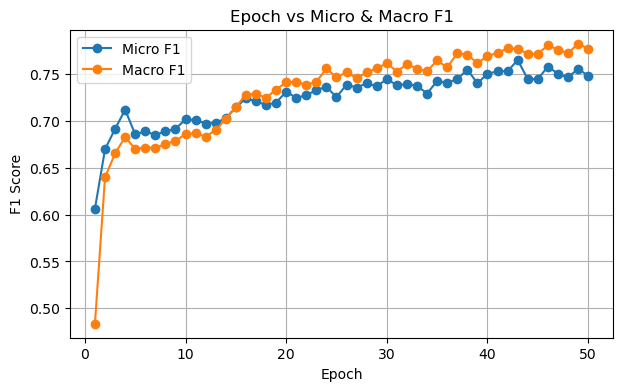

In [48]:
plotResults(historyBaselineCNN)

In [49]:
%%time
model = HAR_CNN(num_classes)
historyHar_CNN = train_model(model, train_loader, val_loader, epochs=50, lr=1e-4)


Epoch 01 | loss: 1.1843 micro F1: 0.5275  macro F1: 0.4036
Epoch 02 | loss: 0.9487 micro F1: 0.5396  macro F1: 0.4728
Epoch 03 | loss: 0.9229 micro F1: 0.5710  macro F1: 0.5280
Epoch 04 | loss: 0.7312 micro F1: 0.6547  macro F1: 0.6269
Epoch 05 | loss: 0.5839 micro F1: 0.6739  macro F1: 0.6573
Epoch 06 | loss: 0.6231 micro F1: 0.6841  macro F1: 0.6690
Epoch 07 | loss: 0.5513 micro F1: 0.7174  macro F1: 0.7066
Epoch 08 | loss: 0.3673 micro F1: 0.7206  macro F1: 0.7109
Epoch 09 | loss: 0.3285 micro F1: 0.7398  macro F1: 0.7297
Epoch 10 | loss: 0.4628 micro F1: 0.7538  macro F1: 0.7420
Epoch 11 | loss: 0.4462 micro F1: 0.7647  macro F1: 0.7514
Epoch 12 | loss: 0.3033 micro F1: 0.7609  macro F1: 0.7506
Epoch 13 | loss: 0.2639 micro F1: 0.7634  macro F1: 0.7524
Epoch 14 | loss: 0.2750 micro F1: 0.7602  macro F1: 0.7503
Epoch 15 | loss: 0.2005 micro F1: 0.7558  macro F1: 0.7474
Epoch 16 | loss: 0.1949 micro F1: 0.7174  macro F1: 0.7185
Epoch 17 | loss: 0.2830 micro F1: 0.7193  macro F1: 0.72

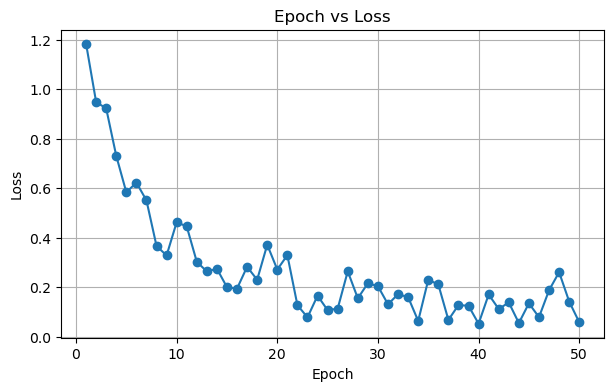

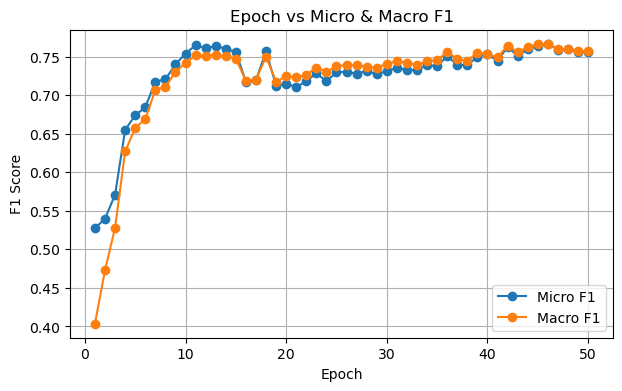

In [50]:
plotResults(historyHar_CNN)

In [51]:
class RCNN(nn.Module):
    def __init__(self, num_classes, hidden_size=128, num_layers=1, bidirectional=False):
        super().__init__()

        self.cnn = nn.Sequential(
            nn.Conv1d(6, 64, kernel_size=7, padding=3),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.MaxPool1d(2),   # 60 -> 30

            nn.Conv1d(64, 128, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.MaxPool1d(2),   # 30 -> 15

            nn.Conv1d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(256)
        )

        self.lstm = nn.LSTM(
            input_size=256,
            hidden_size=hidden_size,
            num_layers=num_layers,
            bidirectional=bidirectional,
            batch_first=True
        )

        lstm_output_size = hidden_size * (2 if bidirectional else 1)
        self.fc = nn.Linear(lstm_output_size, num_classes)

    def forward(self, x):
        """
        x: (batch, 6, 60)
        """
        # CNN -> (batch, 256, 15)
        x = self.cnn(x)

        # Change to (batch, 15, 256) for LSTM
        x = x.transpose(1, 2)

        # LSTM
        out, _ = self.lstm(x)

        # Use last time step
        out = out[:, -1, :]  # (batch, hidden)
        return self.fc(out)


In [52]:
def apply_max_in_norm(model, d_in):
    """
    Scales incoming weights of each unit so ||w_i||_2 <= d_in.
    Works for Linear, Conv1d, and LSTM layers.
    """
    for name, param in model.named_parameters():
        if "weight" not in name:
            continue

        w = param.data

        # Linear layer: shape (out_features, in_features)
        if w.dim() == 2:
            norms = w.norm(2, dim=1, keepdim=True)
            desired = torch.clamp(norms, max=d_in)
            param.data = w * (desired / norms)

        # Conv1d: shape (out_channels, in_channels, kernel)
        elif w.dim() == 3:
            # Treat each filter as incoming weight vector
            flattened = w.view(w.size(0), -1)
            norms = flattened.norm(2, dim=1, keepdim=True)
            desired = torch.clamp(norms, max=d_in)
            scaled = flattened * (desired / norms)
            param.data = scaled.view_as(w)

        # LSTM: PyTorch stores weights as:
        # weight_ih_l[k]: (4*hidden, input)
        # weight_hh_l[k]: (4*hidden, hidden)
        elif w.dim() == 2 and "lstm" in name.lower():
            norms = w.norm(2, dim=1, keepdim=True)
            desired = torch.clamp(norms, max=d_in)
            param.data = w * (desired / norms)


In [53]:
%%time
model = RCNN(num_classes)
historyRCNN = train_model(model, train_loader, val_loader, epochs=50, lr=1e-4)


Epoch 01 | loss: 0.4728 micro F1: 0.7161  macro F1: 0.6781
Epoch 02 | loss: 0.1564 micro F1: 0.7628  macro F1: 0.7288
Epoch 03 | loss: 0.2382 micro F1: 0.7347  macro F1: 0.7225
Epoch 04 | loss: 0.2735 micro F1: 0.7449  macro F1: 0.7432
Epoch 05 | loss: 0.1285 micro F1: 0.7449  macro F1: 0.7335
Epoch 06 | loss: 0.2128 micro F1: 0.7449  macro F1: 0.7482
Epoch 07 | loss: 0.1369 micro F1: 0.7487  macro F1: 0.7460
Epoch 08 | loss: 0.1171 micro F1: 0.7583  macro F1: 0.7523
Epoch 09 | loss: 0.1122 micro F1: 0.7596  macro F1: 0.7620
Epoch 10 | loss: 0.1253 micro F1: 0.7590  macro F1: 0.7534
Epoch 11 | loss: 0.1117 micro F1: 0.7666  macro F1: 0.7592
Epoch 12 | loss: 0.0977 micro F1: 0.7641  macro F1: 0.7580
Epoch 13 | loss: 0.0380 micro F1: 0.7724  macro F1: 0.7658
Epoch 14 | loss: 0.0295 micro F1: 0.7494  macro F1: 0.7528
Epoch 15 | loss: 0.0778 micro F1: 0.7513  macro F1: 0.7564
Epoch 16 | loss: 0.0552 micro F1: 0.7673  macro F1: 0.7605
Epoch 17 | loss: 0.0243 micro F1: 0.7685  macro F1: 0.76

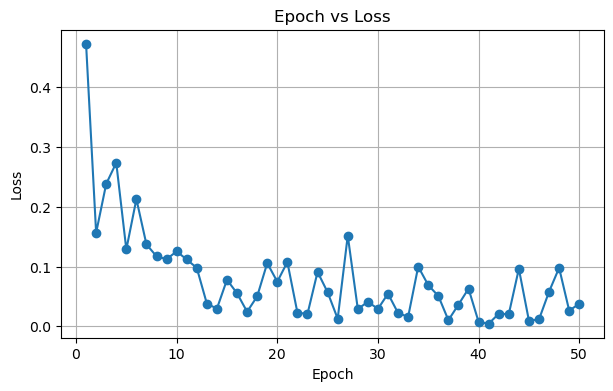

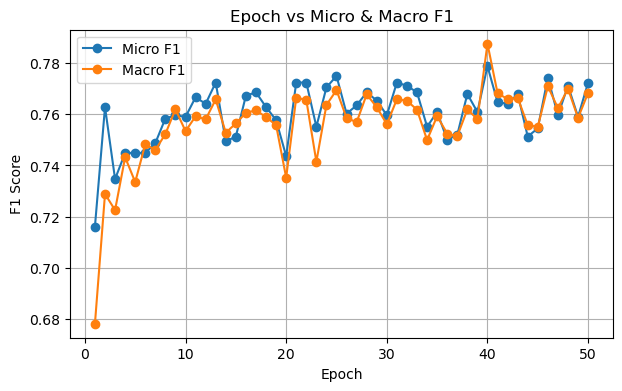

In [54]:
plotResults(historyRCNN)

In [55]:
class LSTMModel(nn.Module):
    def __init__(self, num_classes, input_channels=6, hidden_size=128, num_layers=2, bidirectional=True, dropout=0.3):
        super().__init__()
        self.input_channels = input_channels
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.n_directions = 2 if bidirectional else 1

        # We'll treat each time-step feature vector as size = input_channels
        self.rnn = nn.LSTM(input_size=input_channels,
                           hidden_size=hidden_size,
                           num_layers=num_layers,
                           batch_first=True,
                           bidirectional=bidirectional,
                           dropout=dropout if num_layers > 1 else 0.0)

        self.fc = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(hidden_size * self.n_directions, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        # x: (batch, channels, seq_len) => convert to (batch, seq_len, channels)
        x = x.permute(0, 2, 1).contiguous()
        # RNN returns output: (batch, seq_len, hidden * num_directions)
        out, (hn, cn) = self.rnn(x)  
        # Use mean-pooling over time for robustness
        pooled = out.mean(dim=1)  # (batch, hidden * num_directions)
        return self.fc(pooled)


In [56]:
class GRUModel(nn.Module):
    def __init__(self, num_classes, input_channels=6, hidden_size=128, num_layers=2, bidirectional=True, dropout=0.3):
        super().__init__()
        self.input_channels = input_channels
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.n_directions = 2 if bidirectional else 1

        self.rnn = nn.GRU(input_size=input_channels,
                          hidden_size=hidden_size,
                          num_layers=num_layers,
                          batch_first=True,
                          bidirectional=bidirectional,
                          dropout=dropout if num_layers > 1 else 0.0)

        self.fc = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(hidden_size * self.n_directions, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        # x: (batch, channels, seq_len) -> (batch, seq_len, channels)
        x = x.permute(0, 2, 1).contiguous()
        out, hn = self.rnn(x)
        pooled = out.mean(dim=1)
        return self.fc(pooled)

In [57]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        # Create constant 'pe' matrix with values dependant on pos and i
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # (1, max_len, d_model)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x: (batch, seq_len, d_model) -> add pe[:, :seq_len, :]
        x = x + self.pe[:, :x.size(1), :]
        return x

In [58]:
class TransformerModel(nn.Module):
    def __init__(self, num_classes, input_channels=6, d_model=128, nhead=4, num_layers=3, dim_feedforward=256, dropout=0.2, max_len=60):
        """
        - input_channels: number of sensor axes (6)
        - d_model: embedding size for each time-step
        - nhead: attention heads
        """
        super().__init__()
        self.input_channels = input_channels
        self.d_model = d_model

        # project input channels -> d_model per time-step
        self.input_proj = nn.Linear(input_channels, d_model)

        # positional encoding and transformer encoder
        self.pos_enc = PositionalEncoding(d_model, max_len=max_len)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model,
                                                   nhead=nhead,
                                                   dim_feedforward=dim_feedforward,
                                                   dropout=dropout,
                                                   batch_first=True)  # batch_first=True for (batch, seq, d_model)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # classifier head
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool1d(1),  # we'll transpose to (batch, d_model, seq) before pooling
            nn.Flatten(),
            nn.Dropout(0.3),
            nn.Linear(d_model, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        # x: (batch, channels, seq_len) -> (batch, seq_len, channels)
        x = x.permute(0, 2, 1).contiguous()
        # project per time-step
        x = self.input_proj(x)  # (batch, seq_len, d_model)
        x = self.pos_enc(x)
        # transformer encoder
        x = self.transformer(x)  # (batch, seq_len, d_model)
        # classifier expects (batch, d_model, seq_len)
        x = x.permute(0, 2, 1).contiguous()
        return self.classifier(x)


In [59]:
# assume train_loader, val_loader already exist (from earlier)
num_classes = len(np.unique(y))  # your label count
num_classes

4

In [60]:
%%time
lstm = LSTMModel(num_classes=num_classes)
historyLSTM = train_model(lstm, train_loader, val_loader, epochs=30, lr=1e-3)

Epoch 01 | loss: 0.3786 micro F1: 0.6170  macro F1: 0.4949
Epoch 02 | loss: 0.3992 micro F1: 0.6496  macro F1: 0.6141
Epoch 03 | loss: 0.2399 micro F1: 0.6893  macro F1: 0.6376
Epoch 04 | loss: 0.3404 micro F1: 0.6765  macro F1: 0.6668
Epoch 05 | loss: 0.1103 micro F1: 0.7104  macro F1: 0.6996
Epoch 06 | loss: 0.1584 micro F1: 0.7065  macro F1: 0.6889
Epoch 07 | loss: 0.1723 micro F1: 0.7065  macro F1: 0.7099
Epoch 08 | loss: 0.0920 micro F1: 0.6630  macro F1: 0.6503
Epoch 09 | loss: 0.2661 micro F1: 0.7168  macro F1: 0.7038
Epoch 10 | loss: 0.1506 micro F1: 0.6777  macro F1: 0.6696
Epoch 11 | loss: 0.0485 micro F1: 0.6771  macro F1: 0.6673
Epoch 12 | loss: 0.1241 micro F1: 0.6714  macro F1: 0.6541
Epoch 13 | loss: 0.2495 micro F1: 0.6861  macro F1: 0.6877
Epoch 14 | loss: 0.1207 micro F1: 0.6790  macro F1: 0.6529
Epoch 15 | loss: 0.0984 micro F1: 0.6950  macro F1: 0.6975
Epoch 16 | loss: 0.2028 micro F1: 0.7020  macro F1: 0.6944
Epoch 17 | loss: 0.1120 micro F1: 0.7052  macro F1: 0.70

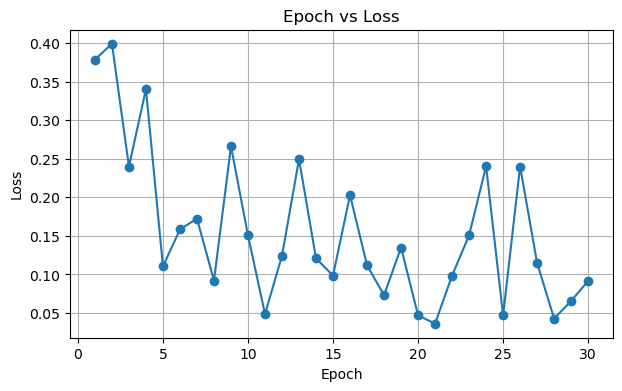

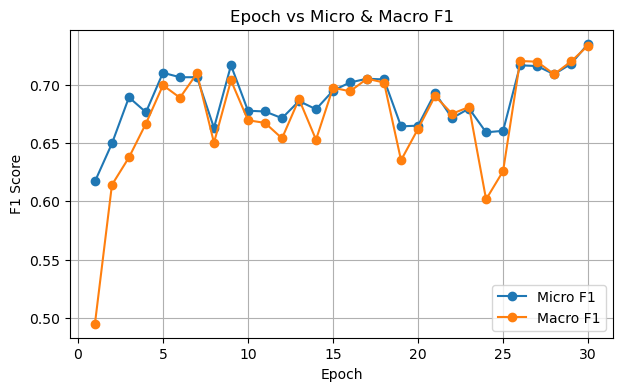

In [61]:
plotResults(historyLSTM)

In [62]:
%%time
gru = GRUModel(num_classes=num_classes)
historyGRU = train_model(gru, train_loader, val_loader, epochs=30, lr=1e-3)

Epoch 01 | loss: 0.3181 micro F1: 0.6240  macro F1: 0.5938
Epoch 02 | loss: 0.1210 micro F1: 0.6253  macro F1: 0.6052
Epoch 03 | loss: 0.3071 micro F1: 0.6618  macro F1: 0.6454
Epoch 04 | loss: 0.2106 micro F1: 0.6579  macro F1: 0.6483
Epoch 05 | loss: 0.1841 micro F1: 0.6573  macro F1: 0.6448
Epoch 06 | loss: 0.1760 micro F1: 0.6528  macro F1: 0.6436
Epoch 07 | loss: 0.2434 micro F1: 0.6669  macro F1: 0.6747
Epoch 08 | loss: 0.1471 micro F1: 0.6784  macro F1: 0.6789
Epoch 09 | loss: 0.0877 micro F1: 0.7033  macro F1: 0.6999
Epoch 10 | loss: 0.2073 micro F1: 0.6765  macro F1: 0.6897
Epoch 11 | loss: 0.1769 micro F1: 0.7052  macro F1: 0.7045
Epoch 12 | loss: 0.1156 micro F1: 0.6982  macro F1: 0.6967
Epoch 13 | loss: 0.1571 micro F1: 0.6656  macro F1: 0.6513
Epoch 14 | loss: 0.1178 micro F1: 0.6918  macro F1: 0.6690
Epoch 15 | loss: 0.0712 micro F1: 0.7251  macro F1: 0.7143
Epoch 16 | loss: 0.1203 micro F1: 0.7110  macro F1: 0.6965
Epoch 17 | loss: 0.0591 micro F1: 0.7423  macro F1: 0.73

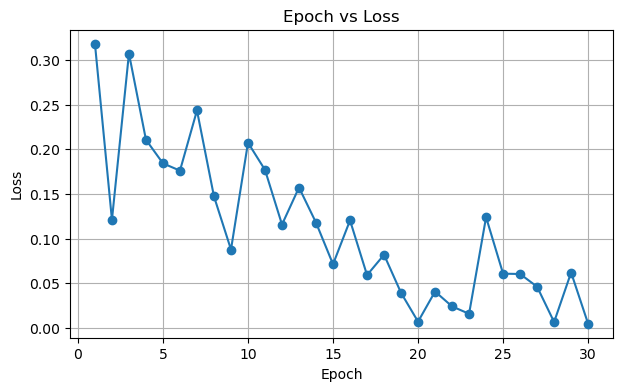

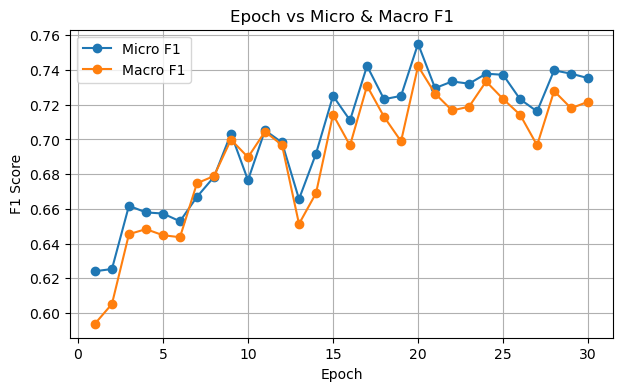

In [63]:
plotResults(historyGRU)

In [64]:
1e-4,3e-4

(0.0001, 0.0003)

In [65]:
%%time
transformer = TransformerModel(num_classes=num_classes, d_model=128, nhead=4, num_layers=3)
historyTransformer = train_model(transformer, train_loader, val_loader, epochs=30, lr=3e-4)

Epoch 01 | loss: 0.4798 micro F1: 0.6803  macro F1: 0.6401
Epoch 02 | loss: 0.2909 micro F1: 0.7442  macro F1: 0.6970
Epoch 03 | loss: 0.2417 micro F1: 0.7379  macro F1: 0.7169
Epoch 04 | loss: 0.2337 micro F1: 0.7020  macro F1: 0.6649
Epoch 05 | loss: 0.2277 micro F1: 0.7084  macro F1: 0.6683
Epoch 06 | loss: 0.2492 micro F1: 0.7270  macro F1: 0.7123
Epoch 07 | loss: 0.1401 micro F1: 0.7442  macro F1: 0.7357
Epoch 08 | loss: 0.1651 micro F1: 0.7302  macro F1: 0.7322
Epoch 09 | loss: 0.1715 micro F1: 0.7308  macro F1: 0.7447
Epoch 10 | loss: 0.0640 micro F1: 0.7391  macro F1: 0.7301
Epoch 11 | loss: 0.1413 micro F1: 0.7238  macro F1: 0.7277
Epoch 12 | loss: 0.0879 micro F1: 0.7340  macro F1: 0.7236
Epoch 13 | loss: 0.0733 micro F1: 0.7008  macro F1: 0.6716
Epoch 14 | loss: 0.0488 micro F1: 0.7379  macro F1: 0.7411
Epoch 15 | loss: 0.1013 micro F1: 0.7340  macro F1: 0.7197
Epoch 16 | loss: 0.0399 micro F1: 0.7052  macro F1: 0.6618
Epoch 17 | loss: 0.0144 micro F1: 0.7353  macro F1: 0.73

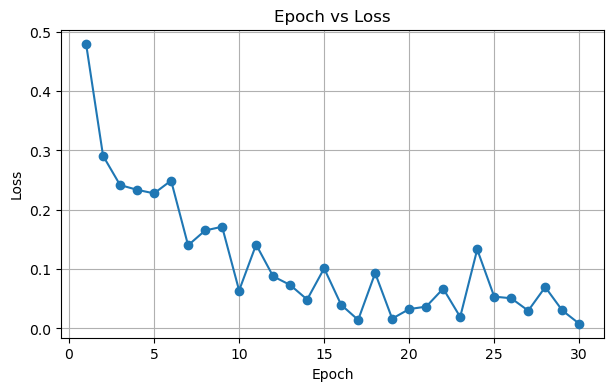

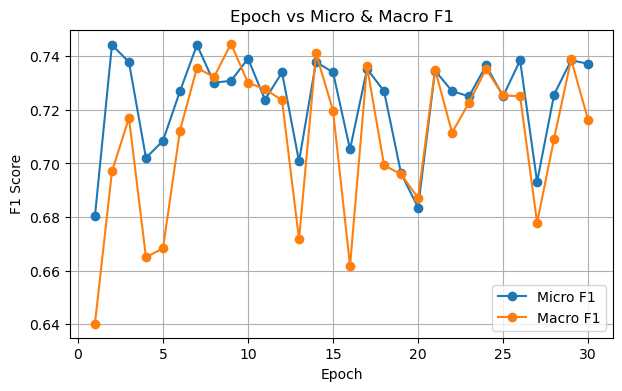

In [66]:
plotResults(historyTransformer)

In [67]:
BASE_PATH = "Downloads/Train_1/"

Micro-averaged F1 score: 0.7939964685108888
Macro-averaged F1 score: 0.7709647119816684


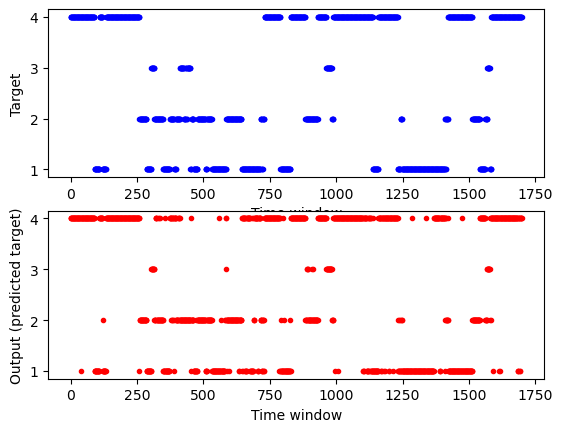

In [68]:
# -*- coding: utf-8 -*-
"""
Demo of logistic regression on mean and standard deviation of each sensor
for activity recognition data
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
sensor_names = ['Acc_x', 'Acc_y', 'Acc_z', 'Gyr_x', 'Gyr_y', 'Gyr_z']
# Last row of training data for train/test split
train_end_index = 3511
# Logistic regression hyperparameters
C = 1
l1_ratio = 0.9
max_iter = int(1e4)
def predict_test(train_data, train_labels, test_data):
    # Feature extraction: compute mean and standard deviation of each row for
    # each sensor and concatenate across sensors to form the feature vector
    mean_train_feature = np.mean(train_data, axis=1)
    std_train_feature = np.std(train_data, axis=1)
    train_features = np.hstack((mean_train_feature, std_train_feature))
    mean_test_feature = np.mean(test_data, axis=1)
    std_test_feature = np.std(test_data, axis=1)
    test_features = np.hstack((mean_test_feature, std_test_feature))
    # Standardize features and train a logistic regression model
    scaler = StandardScaler()
    train_features_std = scaler.fit_transform(train_features)
    test_features_std = scaler.transform(test_features)
    lr = LogisticRegression(penalty='elasticnet', solver='saga',
    max_iter=max_iter, C=C, l1_ratio=l1_ratio)
    lr.fit(train_features_std, train_labels)
    test_outputs = lr.predict(test_features_std)
    return test_outputs
# Run this code only if being used as a script, not being imported
if __name__ == "__main__":
    # Load labels and training sensor data into 3-D array
    labels = np.loadtxt('Downloads/Train_1/labels_train_1.csv', dtype='int')
    data_slice_0 = np.loadtxt(BASE_PATH+sensor_names[0] + '_train_1.csv',
    delimiter=',')
    data = np.empty((data_slice_0.shape[0], data_slice_0.shape[1],
    len(sensor_names)))
    data[:, :, 0] = data_slice_0
    del data_slice_0
    for sensor_index in range(1, len(sensor_names)):
        data[:, :, sensor_index] = np.loadtxt(BASE_PATH+
        sensor_names[sensor_index] + '_train_1.csv', delimiter=',')
    # Split into training and test by row index. Do not use a random split as
    # rows are not independent!
    train_data = data[:train_end_index+1, :, :]
    train_labels = labels[:train_end_index+1]
    test_data = data[train_end_index+1:, :, :]
    test_labels = labels[train_end_index+1:]
    test_outputs = predict_test(train_data, train_labels, test_data)
    # Compute micro and macro-averaged F1 scores
    micro_f1 = f1_score(test_labels, test_outputs, average='micro')
    macro_f1 = f1_score(test_labels, test_outputs, average='macro')
    print(f'Micro-averaged F1 score: {micro_f1}')
    print(f'Macro-averaged F1 score: {macro_f1}')
    # Examine outputs compared to labels
    n_test = test_labels.size
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(n_test), test_labels, 'b.')
    plt.xlabel('Time window')
    plt.ylabel('Target')
    plt.subplot(2, 1, 2)
    plt.plot(np.arange(n_test), test_outputs, 'r.')
    plt.xlabel('Time window')
    plt.ylabel('Output (predicted target)')
    plt.show()

In [69]:
    import numpy as np
    import pandas as pd
    from scipy.stats import skew, kurtosis
    from scipy.signal import find_peaks
    from scipy.fftpack import fft
    from scipy.signal import welch
    from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [70]:
def predict_test(train_data,train_labels,test_data):
    """
    train_data: (5211, 60, 6)
    test_data: (x, 60, 6)
    train_labels: (5211,)
    """
    import numpy as np
    import pandas as pd
    from scipy.stats import skew, kurtosis
    from scipy.signal import find_peaks
    from scipy.fftpack import fft
    from scipy.signal import welch
    from sklearn.linear_model import LogisticRegression, RidgeClassifier
  
    def extract_time_features(x):
        features = {}
        features['mean'] = np.mean(x)
        features['std'] = np.std(x)
        features['var'] = np.var(x)
        features['median'] = np.median(x)
        features['min'] = np.min(x)
        features['max'] = np.max(x)
        features['range'] = np.max(x) - np.min(x)
        features['p10'] = np.percentile(x, 10)
        features['p25'] = np.percentile(x, 25)
        features['p75'] = np.percentile(x, 75)
        features['p90'] = np.percentile(x, 90)
        features['iqr'] = features['p75'] - features['p25']
        features['rms'] = np.sqrt(np.mean(x**2))
        
        features['zero_crossings'] = np.sum(np.diff(np.sign(x)) != 0)
    
        peaks, _ = find_peaks(x)
        features['num_peaks'] = len(peaks)
    
        features['skewness'] = skew(x)
        features['kurtosis'] = kurtosis(x)
    
        return features
    
    
    def extract_freq_features(x, fs=1.0):
        freqs = np.fft.rfftfreq(len(x), 1/fs)
        mag = np.abs(np.fft.rfft(x))
    
        features = {}
        features['spec_energy'] = np.sum(mag**2)
        features['dom_freq'] = freqs[np.argmax(mag)]
        features['mean_freq'] = np.sum(freqs * mag) / np.sum(mag)
    
        p = mag / np.sum(mag)
        features['spec_entropy'] = -np.sum(p * np.log2(p + 1e-12))
    
        features['spec_centroid'] = np.sum(freqs * mag) / np.sum(mag)
    
        features['low_freq_energy'] = np.sum(mag[(freqs <= 0.1)])
        features['mid_freq_energy'] = np.sum(mag[(freqs > 0.1) & (freqs <= 0.3)])
        features['high_freq_energy'] = np.sum(mag[(freqs > 0.3)])
    
        return features
    
    
    def extract_autocorr_features(x):
        corr = np.correlate(x - np.mean(x), x - np.mean(x), mode='full')
        corr = corr[len(corr)//2:] 
    
        features = {
            'autocorr_lag1': corr[1] / corr[0],
            'autocorr_lag2': corr[2] / corr[0],
            'autocorr_max': np.max(corr[1:]) / corr[0]
        }
        return features
    
    def extract_features_from_axis(x):
        f = {}
        f.update(extract_time_features(x))
        f.update(extract_freq_features(x))
        f.update(extract_autocorr_features(x))
        return f
    
    
    def extract_features_from_dataset(data):
        rows = []
        for i in range(data.shape[0]):
            row_features = extract_features_from_axis(data[i])
            rows.append(row_features)
        return pd.DataFrame(rows)

    train_axes = np.transpose(train_data, (2, 0, 1))   # (6, 5211, 60)
    test_axes  = np.transpose(test_data, (2, 0, 1))
    
    feature_dfs = []
    for axis_data in train_axes:
        feature_dfs.append(extract_features_from_dataset(axis_data))
    train_ff = pd.concat(feature_dfs, axis=1)
    
    val_dfs = []
    for axis_data in test_axes:
        val_dfs.append(extract_features_from_dataset(axis_data))
    val_ff = pd.concat(val_dfs, axis=1)
    
    #ridge = RidgeClassifier()
    #ridge = CatBoostClassifier(verbose=0, random_state=42, iterations=500)
    #ridge = lgb.LGBMClassifier(n_estimators=200, random_state=42, verbose=-1)
    #ridge.fit(np.array(train_ff), train_labels)
    #preds = ridge.predict(np.array(val_ff))
    
    print(train_ff.shape)
    print(train_labels.shape)
    print(val_ff.shape)
    
    #ridge = RidgeClassifier()
    ridge = xgb.XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric="mlogloss", random_state=42)
    ridge.fit(np.array(train_ff), train_labels-1)

    
    return ridge.predict(np.array(val_ff))

(5211, 168)
(5211,)
(2442, 168)
Micro-averaged F1 score: 0.920966420966421
Macro-averaged F1 score: 0.9289732798264456


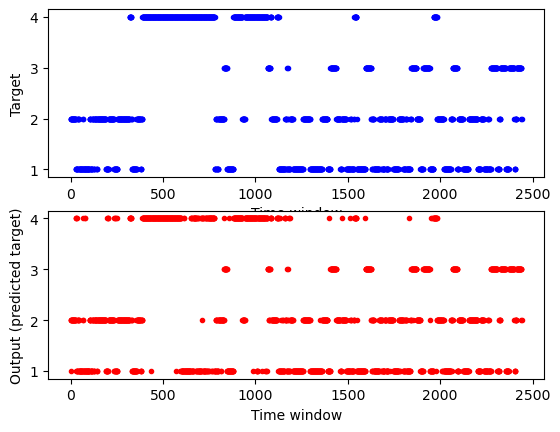

CPU times: total: 2min 55s
Wall time: 2min 24s


In [71]:
%%time 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score


sensor_names = ['Acc_x', 'Acc_y', 'Acc_z', 'Gyr_x', 'Gyr_y', 'Gyr_z']
BASE_PATH = "Downloads/Train_1/"
train_suffix = '_train_1.csv'
test_suffix = '_train_2.csv'
def load_sensor_data(sensor_names, suffix):
    data_slice_0 = np.loadtxt(BASE_PATH + sensor_names[0] + suffix, delimiter=',')
    data = np.empty((data_slice_0.shape[0], data_slice_0.shape[1],len(sensor_names)))
    data[:, :, 0] = data_slice_0
    for sensor_index in range(1, len(sensor_names)):
        data[:, :, sensor_index] = np.loadtxt(BASE_PATH + sensor_names[sensor_index] + suffix, delimiter=',')
    return data
# Load labels and sensor data into 3-D array
train_labels = np.loadtxt(BASE_PATH + 'labels' + train_suffix, dtype='int')
train_data = load_sensor_data(sensor_names, train_suffix)
test_labels = np.loadtxt(BASE_PATH + 'labels' + test_suffix, dtype='int')
test_data = load_sensor_data(sensor_names, test_suffix)
# Predict activities on test data
test_outputs = predict_test(train_data, train_labels, test_data)+1
# Compute micro and macro-averaged F1 scores
micro_f1 = f1_score(test_labels, test_outputs, average='micro')
macro_f1 = f1_score(test_labels, test_outputs, average='macro')
print(f'Micro-averaged F1 score: {micro_f1}')
print(f'Macro-averaged F1 score: {macro_f1}')
# Examine outputs compared to labels
n_test = test_labels.size
plt.subplot(2, 1, 1)
plt.plot(np.arange(n_test), test_labels, 'b.')
plt.xlabel('Time window')
plt.ylabel('Target')
plt.subplot(2, 1, 2)
plt.plot(np.arange(n_test), test_outputs, 'r.')
plt.xlabel('Time window')
plt.ylabel('Output (predicted target)')
plt.show()


In [72]:
"""

CatBoost: 
Micro-averaged F1 score: 0.9434889434889435
Macro-averaged F1 score: 0.9486553566438009

Ridge:
Micro-averaged F1 score: 0.9287469287
Macro-averaged F1 score: 0.93242016344

XgBoost:
Micro-averaged F1 score: 0.920966420966421
Macro-averaged F1 score: 0.9289732798264456

LightGBM:
Micro-averaged F1 score: 0.918918918918919
Macro-averaged F1 score: 0.9263683575229347
"""

'\n\nCatBoost: \nMicro-averaged F1 score: 0.9434889434889435\nMacro-averaged F1 score: 0.9486553566438009\n\nRidge:\nMicro-averaged F1 score: 0.9287469287\nMacro-averaged F1 score: 0.93242016344\n\nXgBoost:\nMicro-averaged F1 score: 0.920966420966421\nMacro-averaged F1 score: 0.9289732798264456\n\nLightGBM:\nMicro-averaged F1 score: 0.918918918918919\nMacro-averaged F1 score: 0.9263683575229347\n'

In [73]:
print(f'Micro-averaged F1 score: {micro_f1}')
print(f'Macro-averaged F1 score: {macro_f1}')

Micro-averaged F1 score: 0.920966420966421
Macro-averaged F1 score: 0.9289732798264456
